In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

/Users/andrewshaw/miniconda3/envs/midi/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
from music21 import *

In [6]:
ad = Path('../medium_post_assets')

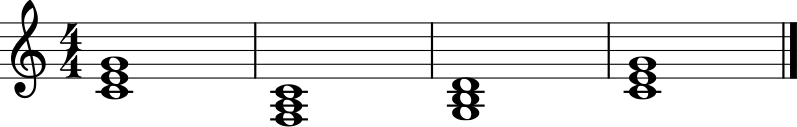

In [5]:
# Let's create a partial progression I-V-vi
c = music21.stream.Part()
c.append(music21.chord.Chord('C4 E4 G4', type='whole')) # I
c.append(music21.chord.Chord('F3 A3 C4', type='whole')) # IV
c.append(music21.chord.Chord('G3 B3 D4', type='whole')) # V
c.append(music21.chord.Chord('C4 E4 G4', type='whole')) # I
# c.append(music21.chord.Chord('A3 C4 E4', type='whole')) # vi

c.show()
# chord_item = MusicItem.from_stream(s, vocab)
# chord_item.show()

## Sequence To Sequence

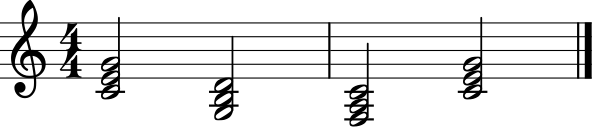

In [94]:
# Let's create a partial progression I-V-vi
c = music21.stream.Part()
i = music21.instrument.Piano()
i.instrumentName = 'Chords'

# c.append(music21.meter.TimeSignature('4/4'))
# c.append(music21.key.KeySignature(0))

c.append(i)
c.append(music21.chord.Chord('C4 E4 G4', type='half')) # I
c.append(music21.chord.Chord('G3 B3 D4', type='half')) # V
c.append(music21.chord.Chord('F3 A3 C4', type='half')) # IV
c.append(music21.chord.Chord('C4 E4 G4', type='half')) # I

# c.append(music21.chord.Chord('F3 A3 C4', type='half')) # IV
# c.append(music21.chord.Chord('C4 E4 G4', type='half')) # I
# c.append(music21.chord.Chord('G3 B3 D4', type='half')) # V
# c.append(music21.chord.Chord('C4 E4 G4', type='half')) # I

c.write('midi', ad/'../s2s_chords.mid')
c.show()
# chord_item = MusicItem.from_stream(s, vocab)
# chord_item.show()

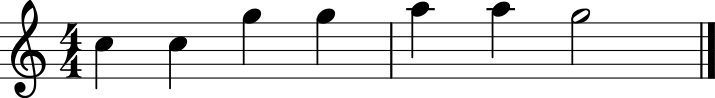

In [102]:
m = music21.stream.Part()
notes = ['C5', 'C5', 'G5', 'G5', 'A5', 'A5', ('G5', 'half')]
# notes = notes + ['F5', 'F5', 'E5', 'E5', 'D5', 'D5', ('C5', 'half')]
i = music21.instrument.Piano()
i.instrumentName = 'Melody'
m.insert(i)

for n in notes:
    if isinstance(n, tuple):
        m.append(music21.note.Note(n[0], type=n[1]))
    else:
        m.append(music21.note.Note(n))
m.write('midi', ad/'s2s_melody.mid')
m.show()

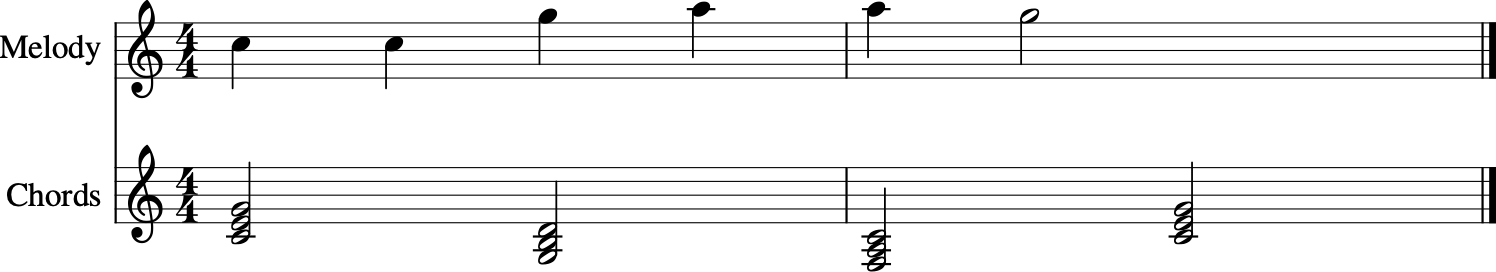

In [96]:
s = music21.stream.Score([m, c])
s.write('midi', ad/'s2s_score.mid')
s.show()

### Mask

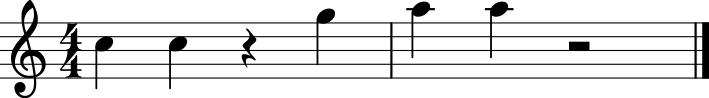

In [97]:
m = music21.stream.Part()
notes = ['C5', 'C5', None, 'G5', 'A5', 'A5', (None, 'half')]
# notes = notes + ['F5', 'F5', 'E5', 'E5', 'D5', 'D5', ('C5', 'half')]
i = music21.instrument.Piano()
i.instrumentName = 'Melody'
m.insert(i)

for n in notes:
    t = 'quarter'
    if isinstance(n, tuple): n, t = n
    if n == None:
        m.append(music21.note.Rest(type=t))
    else:
        m.append(music21.note.Note(n, type=t))

m.write('midi', ad/'mask_input.mid')
m.show()

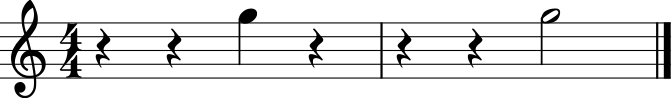

In [98]:
m = music21.stream.Part()
notes = [None, None, 'G5', None, None, None, ('G5', 'half')]
# notes = notes + ['F5', 'F5', 'E5', 'E5', 'D5', 'D5', ('C5', 'half')]
i = music21.instrument.Piano()
i.instrumentName = 'Melody'
m.insert(i)

for n in notes:
    t = 'quarter'
    if isinstance(n, tuple): n, t = n
    if n == None:
        m.append(music21.note.Rest(type=t))
    else:
        m.append(music21.note.Note(n, type=t))

m.write('midi', ad/'mask_output.mid')
m.show()

Next Word

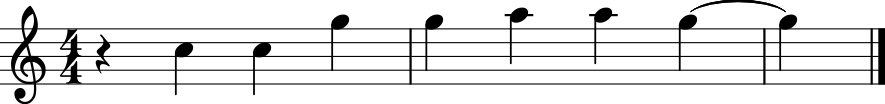

In [109]:
m = music21.stream.Part()
notes = [None, 'C5', 'C5', 'G5', 'G5', 'A5', 'A5', ('G5', 'half')]
# notes = notes + ['F5', 'F5', 'E5', 'E5', 'D5', 'D5', ('C5', 'half')]
i = music21.instrument.Piano()
i.instrumentName = 'Melody'
m.insert(i)

for n in notes:
    t = 'quarter'
    if isinstance(n, tuple): n, t = n
    if n == None:
        m.append(music21.note.Rest(type=t))
    else:
        m.append(music21.note.Note(n, type=t))

m.write('midi', ad/'nw_input.mid')
m.show()

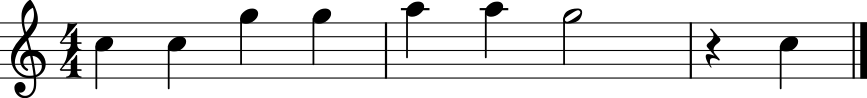

In [110]:
m = music21.stream.Part()
notes = ['C5', 'C5', 'G5', 'G5', 'A5', 'A5', ('G5', 'half'), None, 'C5']
# notes = notes + ['F5', 'F5', 'E5', 'E5', 'D5', 'D5', ('C5', 'half')]
i = music21.instrument.Piano()
i.instrumentName = 'Melody'
m.insert(i)

for n in notes:
    t = 'quarter'
    if isinstance(n, tuple): n, t = n
    if n == None:
        m.append(music21.note.Rest(type=t))
    else:
        m.append(music21.note.Note(n, type=t))

m.write('midi', ad/'nw_output.mid')
m.show()

## Mask Drums

In [101]:
m = music21.stream.Part()
notes = ['C5', 'C5', 'G5', 'A5', 'A5', ('G5', 'half')]
# notes = notes + ['F5', 'F5', 'E5', 'E5', 'D5', 'D5', ('C5', 'half')]
i = music21.instrument.UnpitchedPercussion()
i.instrumentName = 'Melody'
m.insert(i)

for n in notes:
    t = 'quarter'
    if isinstance(n, tuple): n, t = n
    if n == None:
        m.append(music21.note.Rest(type=t))
    else:
        m.append(music21.note.Note(n, type=t))

# m.write('midi', 'nw_output.mid')
# m.show()

In [72]:
# f = get_files(Path('data/midi/examples'))[0]

# fs = file2stream(f)

# fs.show('text')

